# EDA

**Key Findings on Attrition Drivers**

1. *Work-Life Balance & Job Satisfaction Matter:*
Employees with low Work-Life Balance (1 or 2) show significantly higher attrition rates.
Lower Job Satisfaction correlates strongly with higher attrition.
Salary & Promotions Impact Retention

2. *Lower Monthly Income employees have higher attrition rates.*
Employees who haven’t been promoted in a long time (high YearsSinceLastPromotion) are more likely to leave.

3. *Experience & Training Affect Turnover:*
Employees with fewer Total Working Years (0-5 years) are at higher risk of leaving.
Less frequent training (TrainingTimesLastYear < 2) is linked to higher attrition.

4. *Performance Rating & Satisfaction Metrics are Weak Predictors:*
Performance Rating does not show strong correlation with attrition.
Relationship Satisfaction also does not significantly impact attrition trends.

5. *Attrition Tends to be Higher in Employees Who Worked for Multiple Companies:*
Employees with higher NumCompaniesWorked (≥3) tend to leave more often, suggesting a pattern of frequent job changes.

**Actionable Recommendations**
*   Enhance training programs → Provide more upskilling opportunities to retain employees.
*   Identify high-risk new employees (0-5 years experience) → Offer mentorship programs for retention.
*   Improve salary & promotion policies → Focus on employees in lower salary ranges and those overdue for a promotion.
*   Increase work-life balance initiatives → More flexible hours, remote work options



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

Dataset Overview

In [2]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display basic dataset information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

Variable Distribution

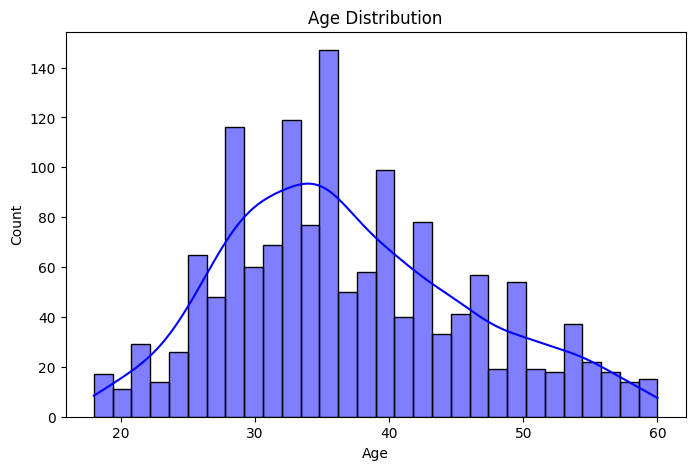

In [3]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

<ipython-input-4-047d5de2da01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Department", data=df, palette="viridis")


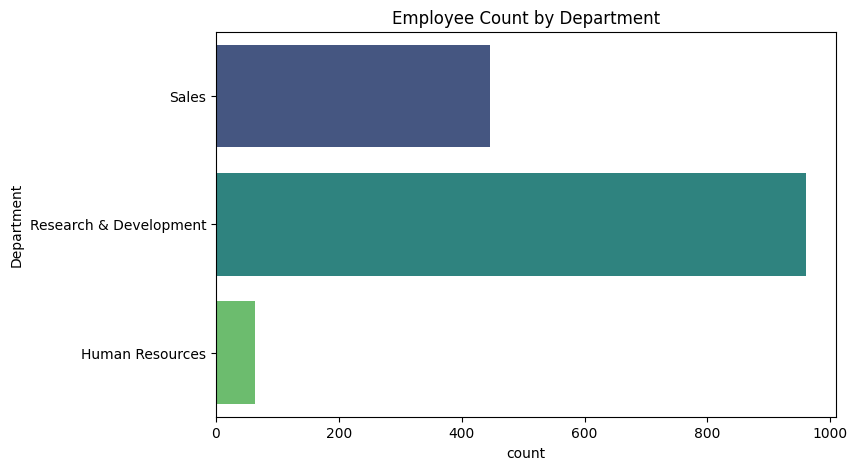

In [4]:
# Countplot for Department
plt.figure(figsize=(8, 5))
sns.countplot(y="Department", data=df, palette="viridis")
plt.title("Employee Count by Department")
plt.show()

<ipython-input-5-1f8df985a4c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="JobRole", y="MonthlyIncome", data=df, palette="magma")


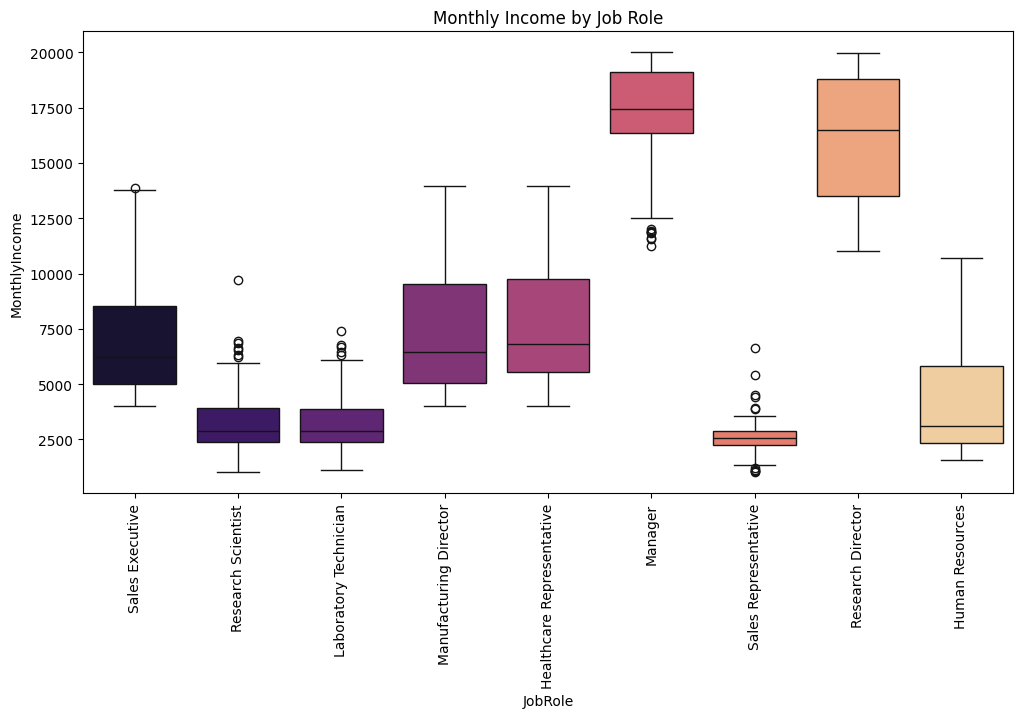

In [5]:
# Boxplot for Monthly Income by Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(x="JobRole", y="MonthlyIncome", data=df, palette="magma")
plt.xticks(rotation=90)
plt.title("Monthly Income by Job Role")
plt.show()

<ipython-input-6-4e312484a159>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TotalWorkingYears", y="MonthlyIncome", data=df, palette="Blues")


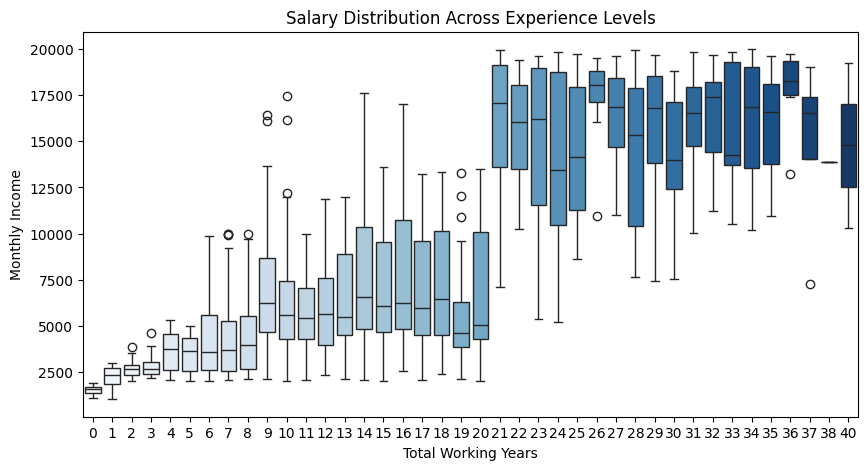

In [6]:
# Feature Distribution: Salary vs. Experience
plt.figure(figsize=(10, 5))
sns.boxplot(x="TotalWorkingYears", y="MonthlyIncome", data=df, palette="Blues")
plt.title("Salary Distribution Across Experience Levels")
plt.xlabel("Total Working Years")
plt.ylabel("Monthly Income")
plt.show()

Correlation

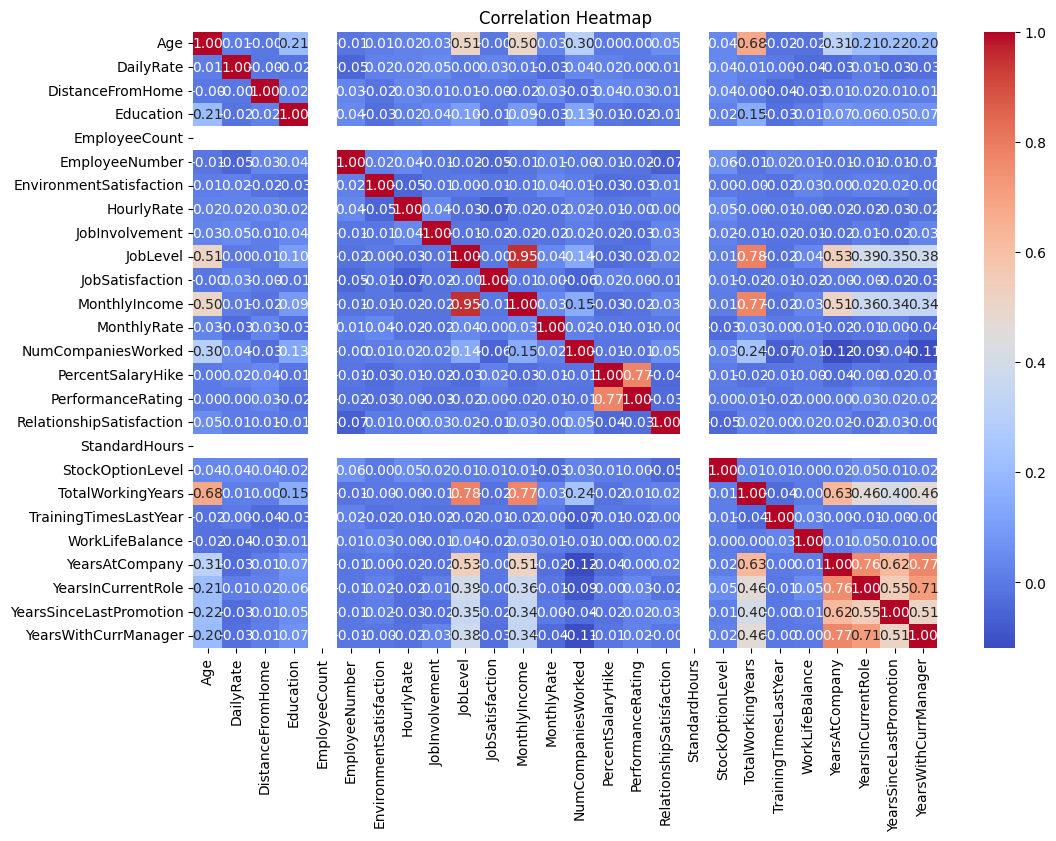

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

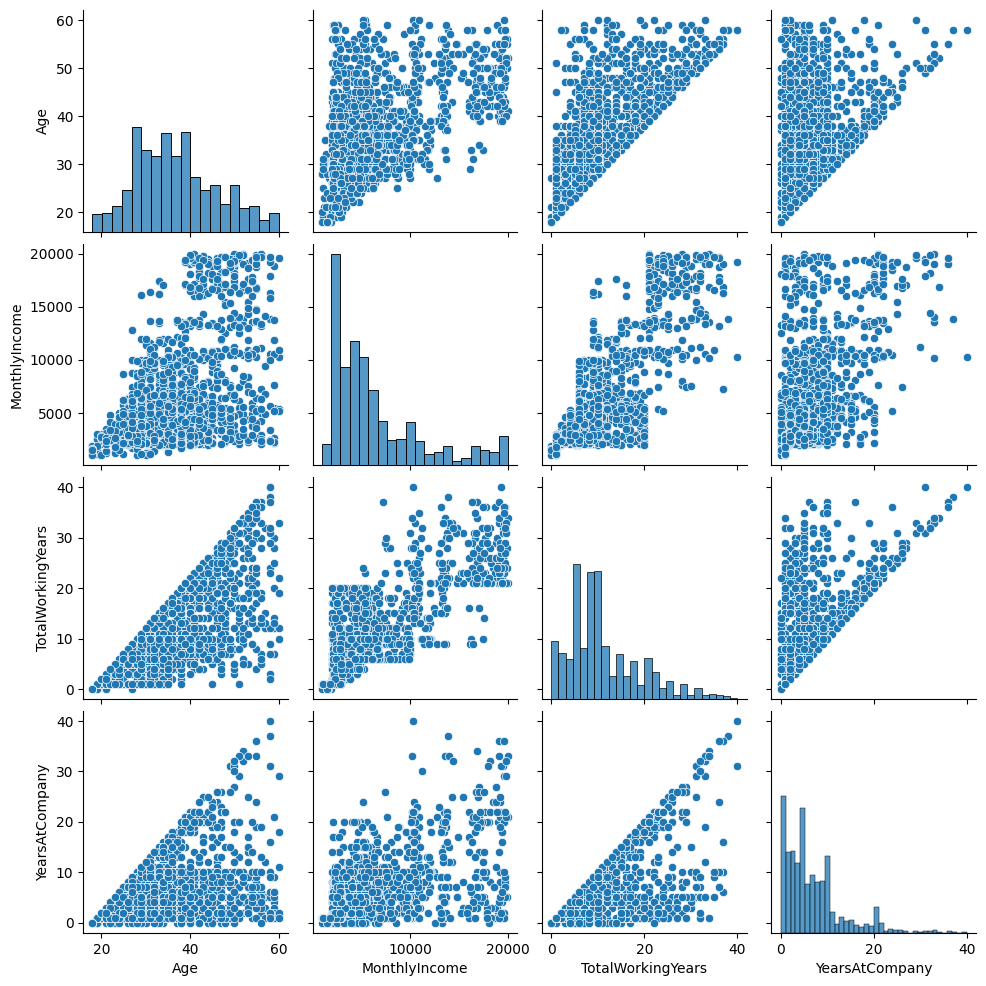

In [8]:
# Pairplot for selected features
selected_features = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]
sns.pairplot(df[selected_features])
plt.show()

Explore Attrition

In [9]:
# Set plot style
sns.set(style="whitegrid")

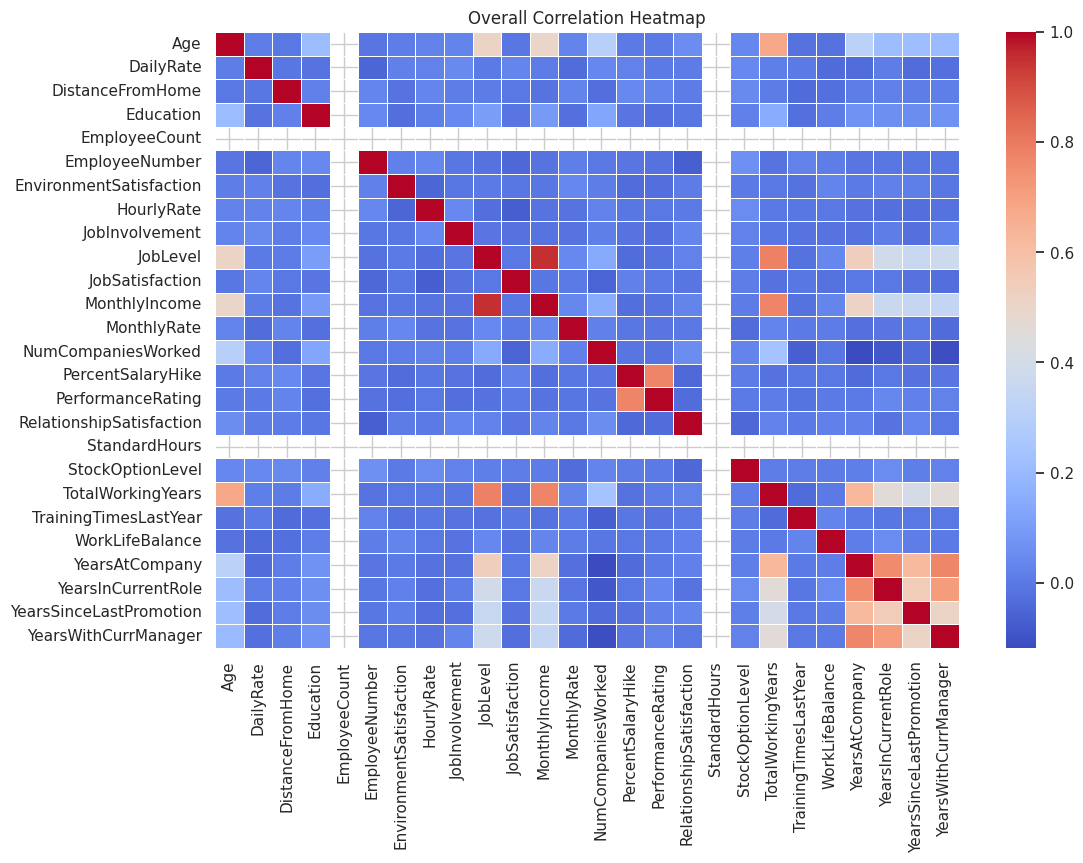

In [10]:
### Correlation Heatmap (Attrition vs. All Numeric Variables)
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Overall Correlation Heatmap")
plt.show()

<ipython-input-11-a40af992092c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


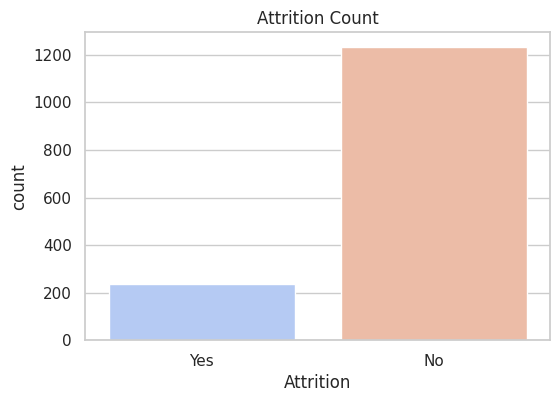

In [11]:
# Countplot for Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Count")
plt.show()

<ipython-input-12-e701b1f897c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="YearsAtCompany", data=df, palette="Set2")


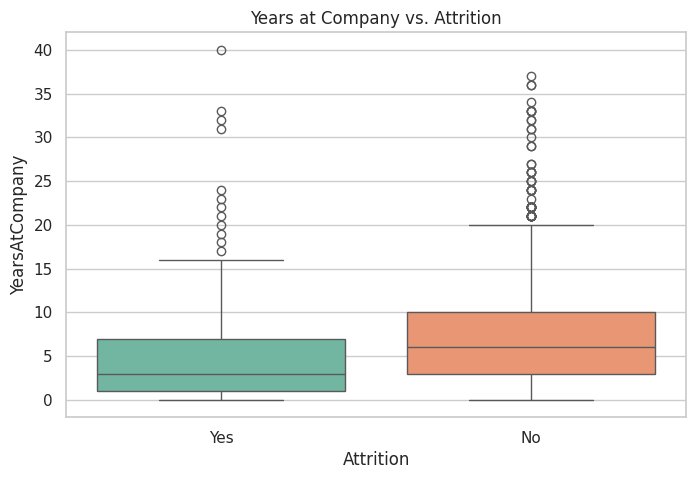

In [12]:
# Attrition vs. Years at Company
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df, palette="Set2")
plt.title("Years at Company vs. Attrition")
plt.show()

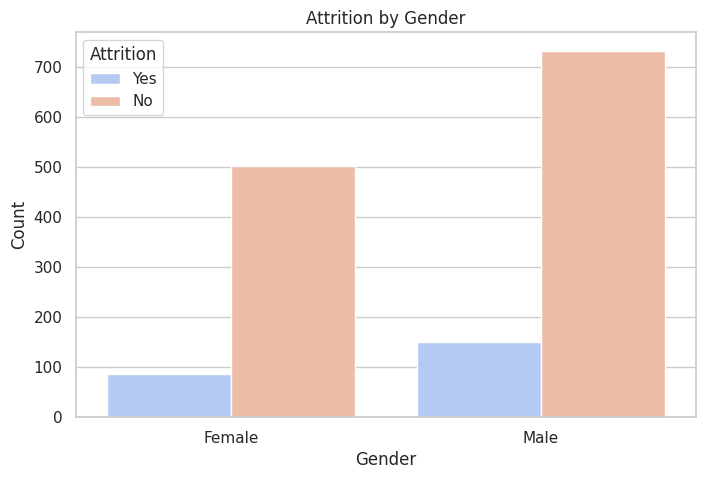

In [13]:
# Attrition Breakdown by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Attrition", data=df, palette="coolwarm")
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

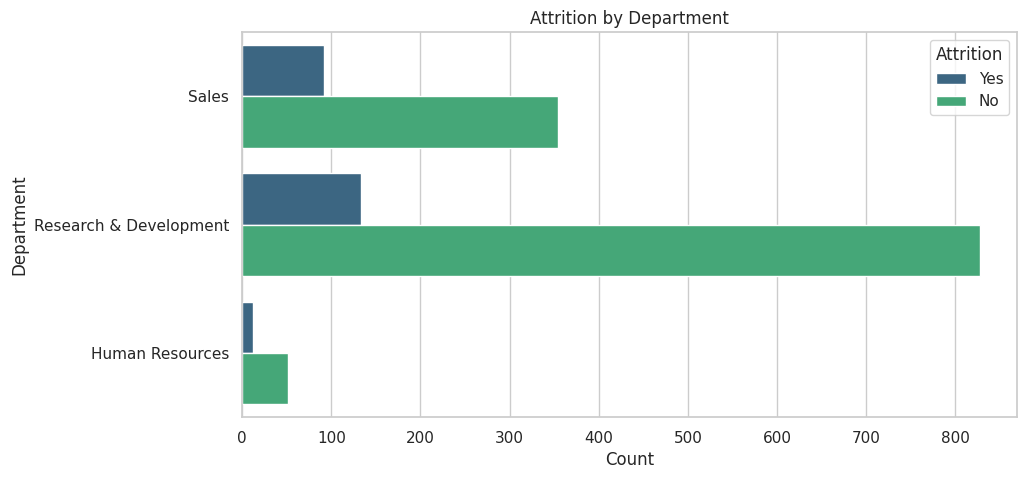

In [14]:
# Attrition Breakdown by Department
plt.figure(figsize=(10, 5))
sns.countplot(y="Department", hue="Attrition", data=df, palette="viridis")
plt.title("Attrition by Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()

<ipython-input-15-36cdef9abe67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")


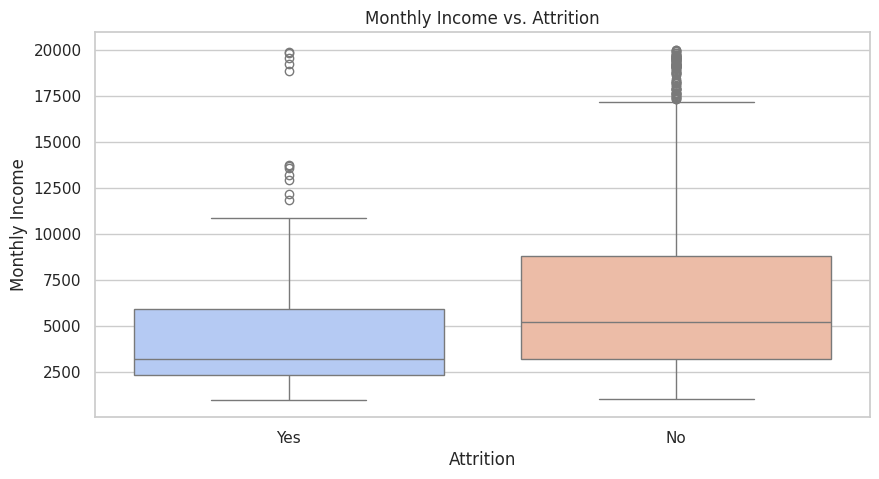

In [15]:
### Attrition vs. Salary (Monthly Income)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")
plt.title("Monthly Income vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

<ipython-input-16-1a6747e29d0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df, palette="coolwarm")


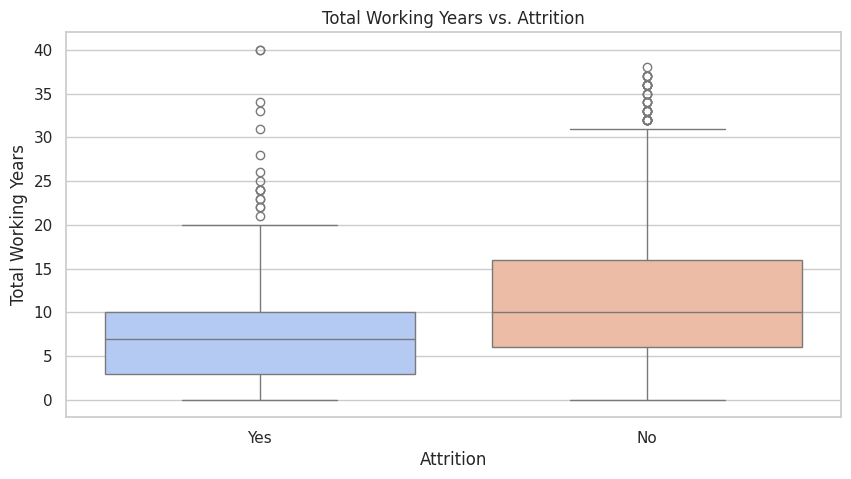

In [16]:
### Attrition vs. Total Working Years
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df, palette="coolwarm")
plt.title("Total Working Years vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()

<ipython-input-17-3df2b7f9989e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df, palette="coolwarm")


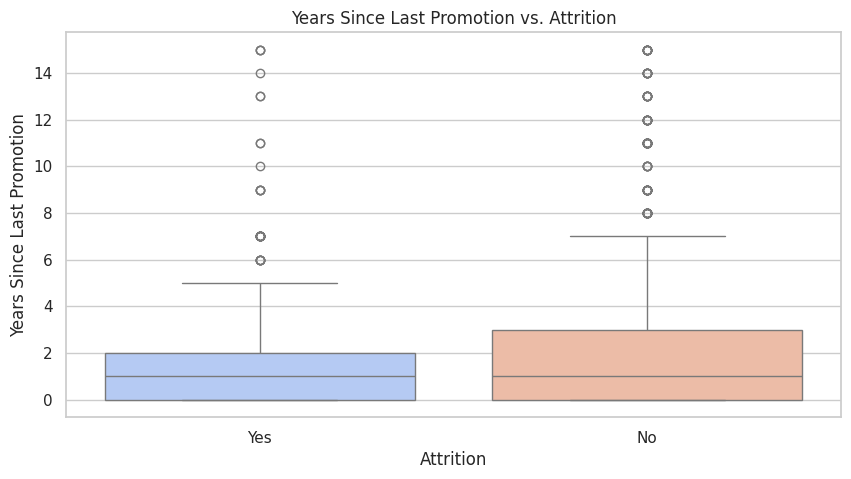

In [17]:
### Attrition vs. Years Since Last Promotion
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df, palette="coolwarm")
plt.title("Years Since Last Promotion vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years Since Last Promotion")
plt.show()

<ipython-input-18-d0704a93857a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="IncomeBin", y="Attrition", data=df, palette="coolwarm")


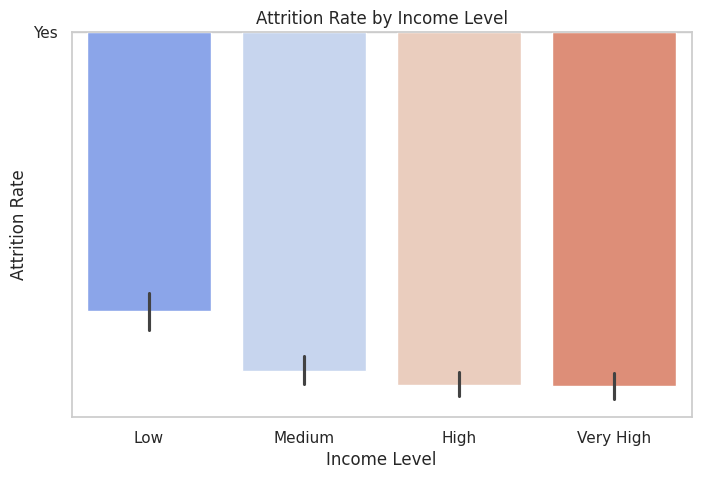

In [18]:
### Attrition Rate Across Salary Levels (Binned)
df["IncomeBin"] = pd.qcut(df["MonthlyIncome"], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8, 5))
sns.barplot(x="IncomeBin", y="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Rate by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Attrition Rate")
plt.show()

<ipython-input-19-b3767d45468c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ExperienceBin", y="Attrition", data=df, palette="coolwarm")


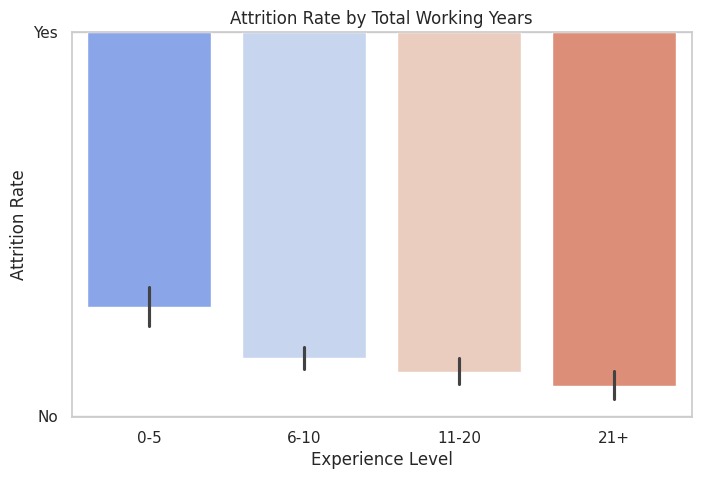

In [19]:
### Attrition Rate Across Experience Levels
df["ExperienceBin"] = pd.cut(df["TotalWorkingYears"], bins=[0, 5, 10, 20, 40], labels=["0-5", "6-10", "11-20", "21+"])
plt.figure(figsize=(8, 5))
sns.barplot(x="ExperienceBin", y="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Rate by Total Working Years")
plt.xlabel("Experience Level")
plt.ylabel("Attrition Rate")
plt.show()

<ipython-input-20-de7a3ef80ed8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="JobSatisfaction", y="Attrition", data=df, palette="coolwarm")


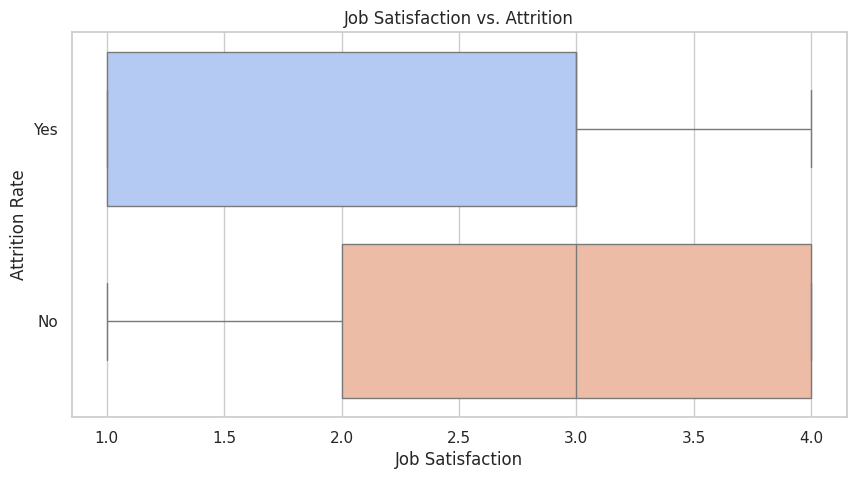

In [20]:
### Attrition vs. Job Satisfaction
plt.figure(figsize=(10, 5))
sns.boxplot(x="JobSatisfaction", y="Attrition", data=df, palette="coolwarm")
plt.title("Job Satisfaction vs. Attrition")
plt.xlabel("Job Satisfaction")
plt.ylabel("Attrition Rate")
plt.show()

<ipython-input-21-99e6d7b6a964>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="WorkLifeBalance", y="Attrition", data=df, palette="coolwarm")


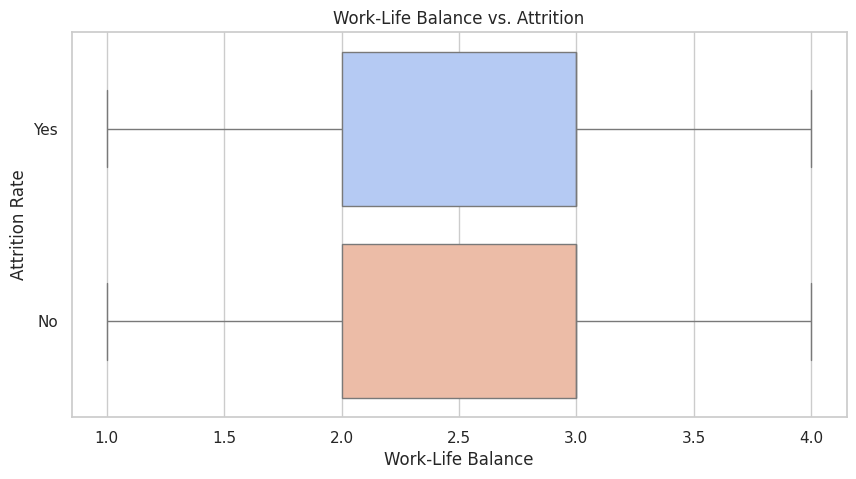

In [21]:
### Attrition vs. Work-Life Balance
plt.figure(figsize=(10, 5))
sns.boxplot(x="WorkLifeBalance", y="Attrition", data=df, palette="coolwarm")
plt.title("Work-Life Balance vs. Attrition")
plt.xlabel("Work-Life Balance")
plt.ylabel("Attrition Rate")
plt.show()

<ipython-input-22-3753719fe098>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=df, palette="coolwarm")


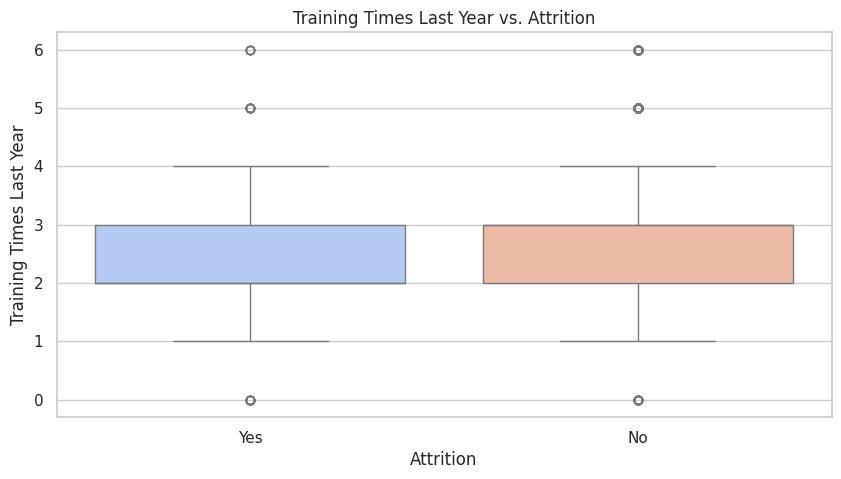

In [22]:
### Attrition vs. Training Times
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=df, palette="coolwarm")
plt.title("Training Times Last Year vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Training Times Last Year")
plt.show()

<ipython-input-23-bf12cbf828c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=df, palette="coolwarm")


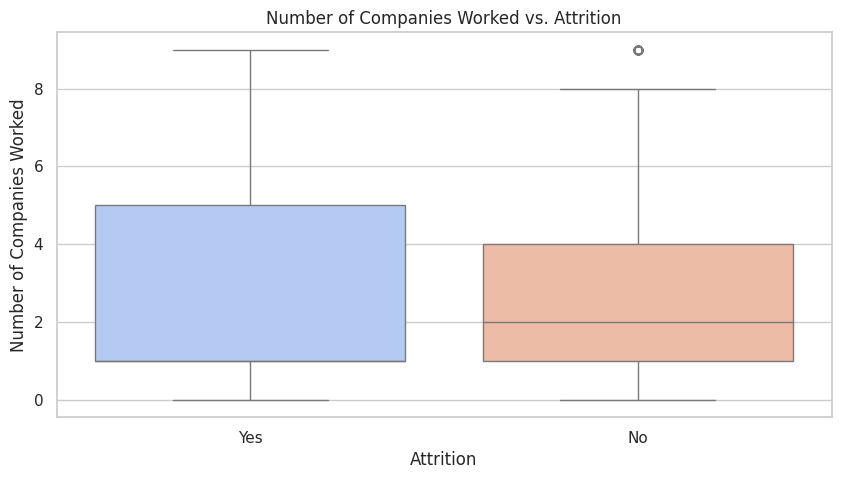

In [23]:
### Attrition vs. Number of Companies Worked
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=df, palette="coolwarm")
plt.title("Number of Companies Worked vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Number of Companies Worked")
plt.show()

<ipython-input-24-10db8b7ec73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PerformanceRating", y="Attrition", data=df, palette="coolwarm")


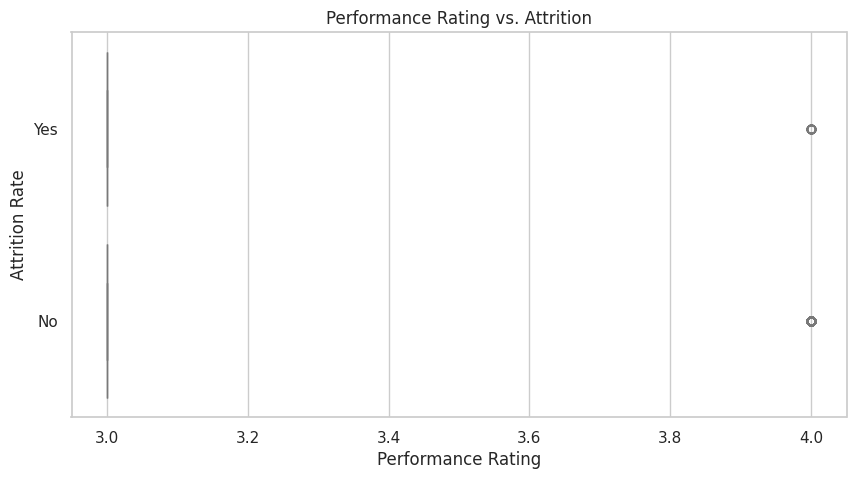

In [24]:
### Attrition vs. Performance Rating
plt.figure(figsize=(10, 5))
sns.boxplot(x="PerformanceRating", y="Attrition", data=df, palette="coolwarm")
plt.title("Performance Rating vs. Attrition")
plt.xlabel("Performance Rating")
plt.ylabel("Attrition Rate")
plt.show()

<ipython-input-25-52f4b883dacb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RelationshipSatisfaction", y="Attrition", data=df, palette="coolwarm")


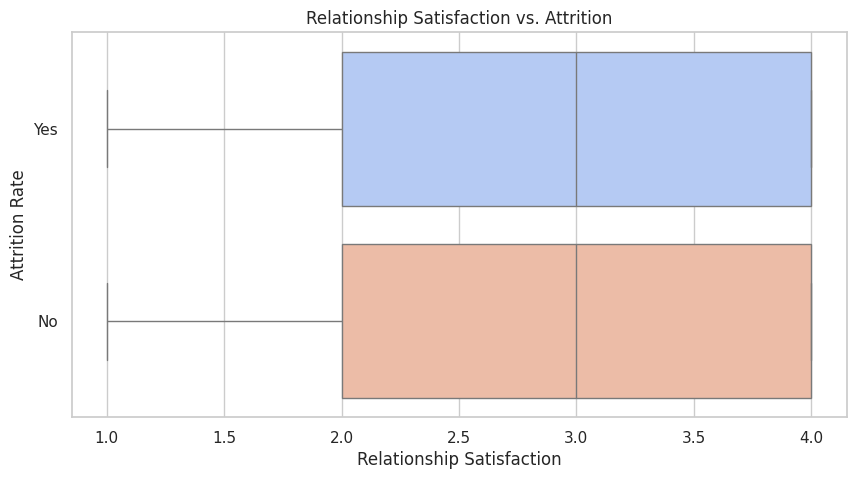

In [25]:
### Attrition vs.Relationship Satisfaction
plt.figure(figsize=(10, 5))
sns.boxplot(x="RelationshipSatisfaction", y="Attrition", data=df, palette="coolwarm")
plt.title("Relationship Satisfaction vs. Attrition")
plt.xlabel("Relationship Satisfaction")
plt.ylabel("Attrition Rate")
plt.show()


Feature Importance (Correlation with Attrition):
Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount            

<ipython-input-26-85dbd7f5dcb5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index[1:], y=correlation.values[1:], palette="Reds")


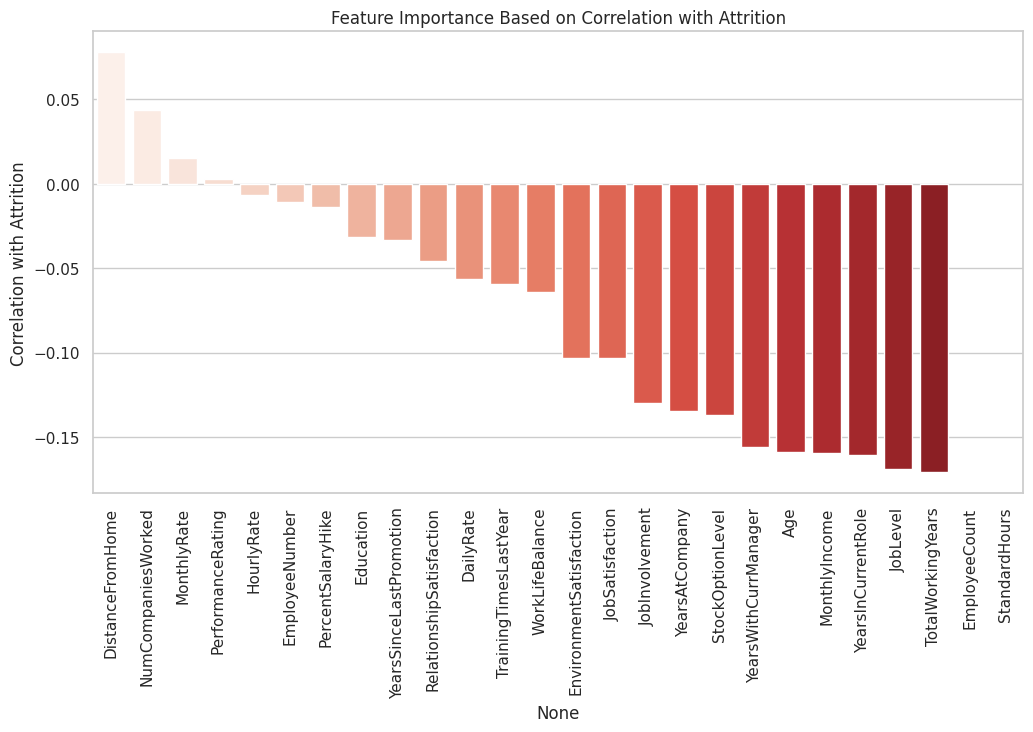

In [26]:
# Feature Importance (Correlation with Attrition)
# Convert 'Attrition' column to numeric
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
correlation = df.corr(numeric_only=True)["Attrition"].sort_values(ascending=False)

# Display correlation values
print("\nFeature Importance (Correlation with Attrition):")
print(correlation)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.index[1:], y=correlation.values[1:], palette="Reds")
plt.xticks(rotation=90)
plt.title("Feature Importance Based on Correlation with Attrition")
plt.ylabel("Correlation with Attrition")
plt.show()

# EDA for Modelling

In [27]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Convert categorical variables to numeric
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Convert Attrition column to numeric explicitly
df["Attrition"] = df["Attrition"].map({1: 1, 0: 0})  # Ensure 1=Yes, 0=No

# Set plot style
sns.set(style="whitegrid")

EDA for Supervised Learning (Classification) - Attrition Prediction

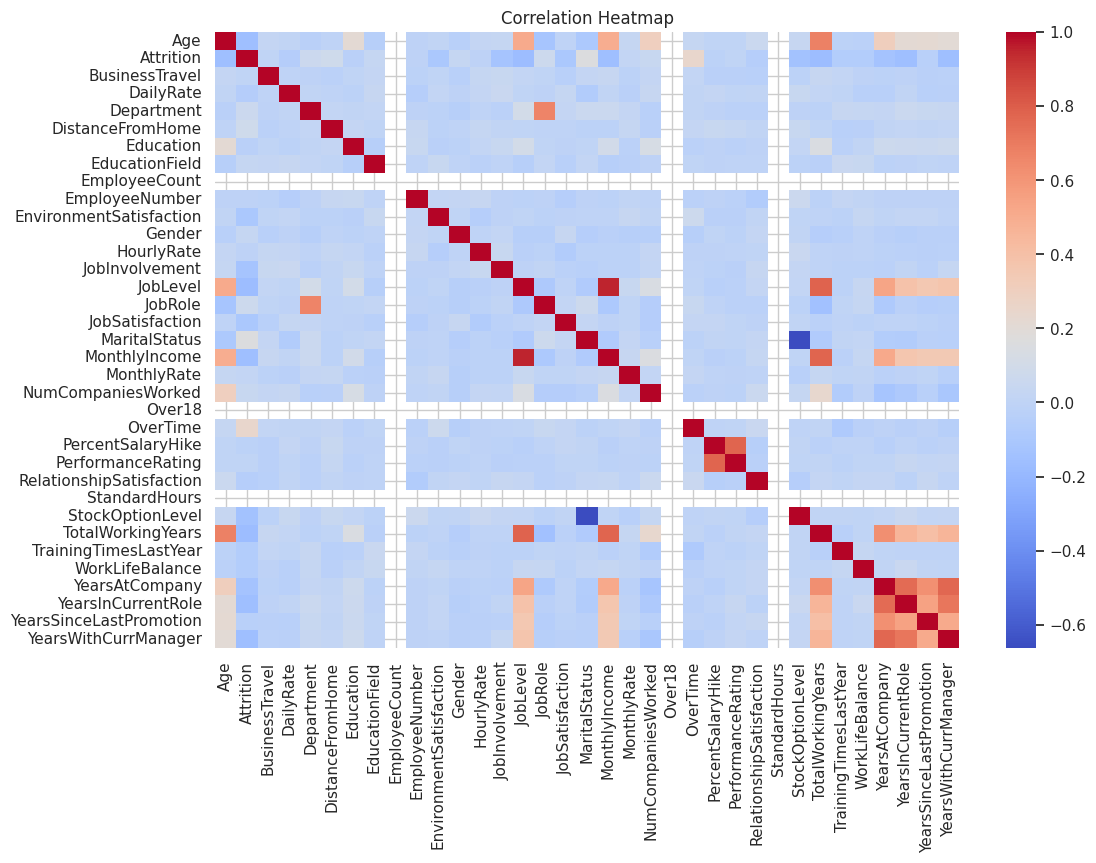

In [28]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-29-4c9573244a7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


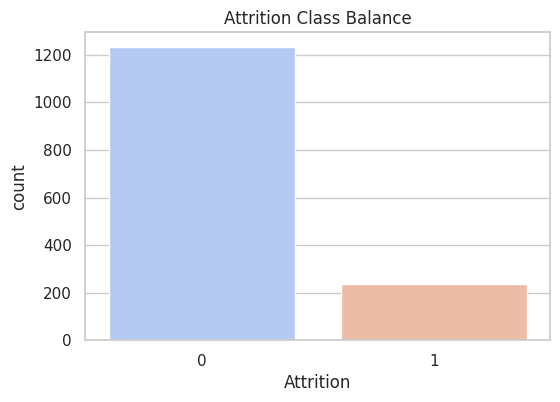

In [29]:
# Attrition Class Balance Check
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Class Balance")
plt.show()

<ipython-input-30-a51274f78f55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")


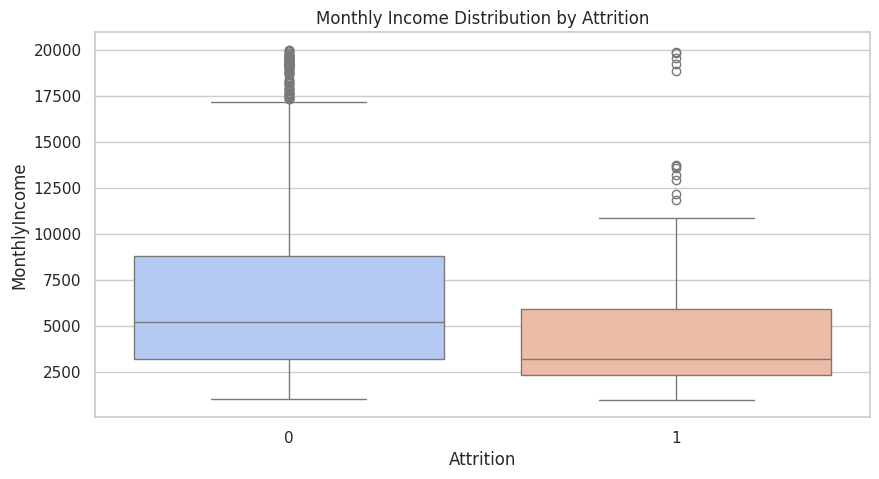

<ipython-input-30-a51274f78f55>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df, palette="coolwarm")


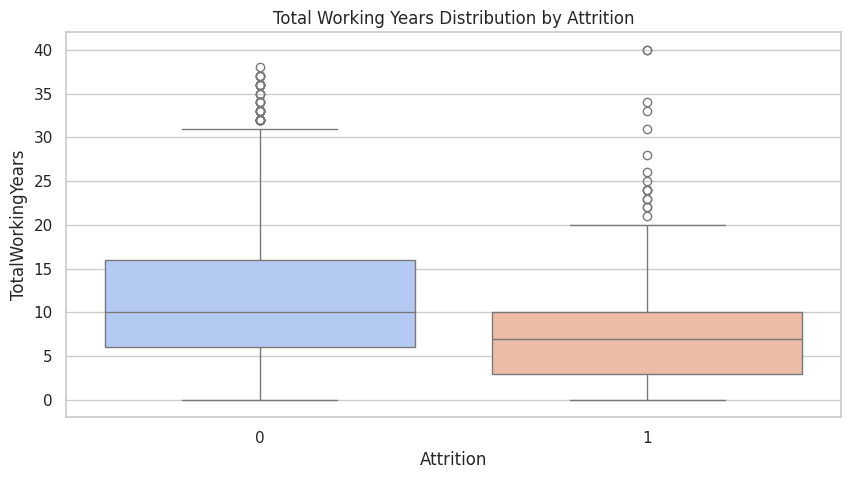

In [30]:
# Feature Distributions by Attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")
plt.title("Monthly Income Distribution by Attrition")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df, palette="coolwarm")
plt.title("Total Working Years Distribution by Attrition")
plt.show()

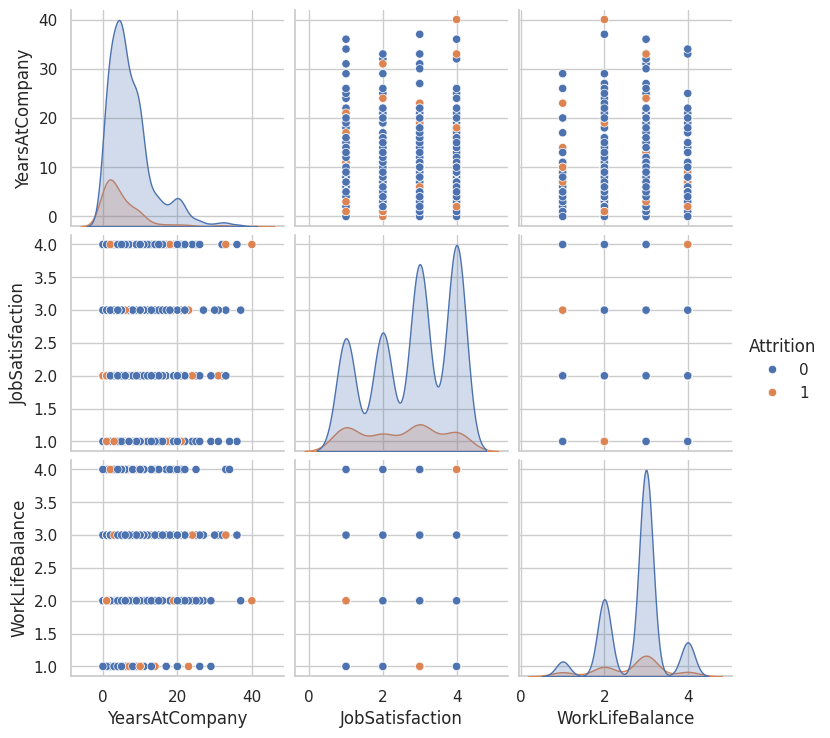

In [31]:
# Interaction Plots
sns.pairplot(df, vars=["YearsAtCompany", "JobSatisfaction", "WorkLifeBalance"], hue="Attrition")
plt.show()

EDA for Unsupervised Learning (Clustering) - Employee Segmentation

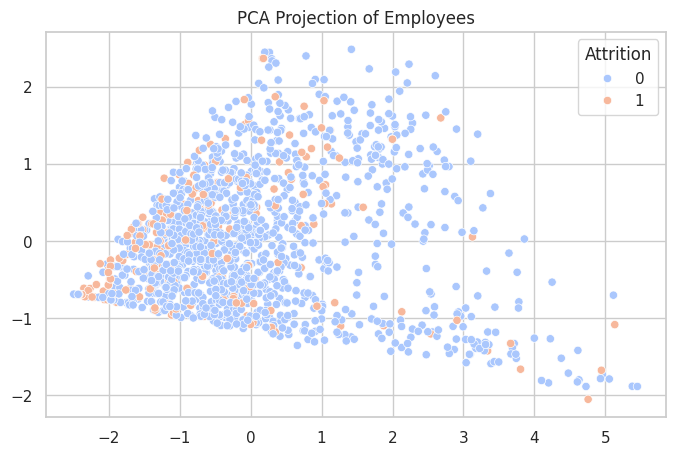

In [32]:
# Scale the features for Clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["Age", "MonthlyIncome", "YearsAtCompany"]])

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Scatterplot of PCA components
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["Attrition"], palette="coolwarm")
plt.title("PCA Projection of Employees")
plt.show()

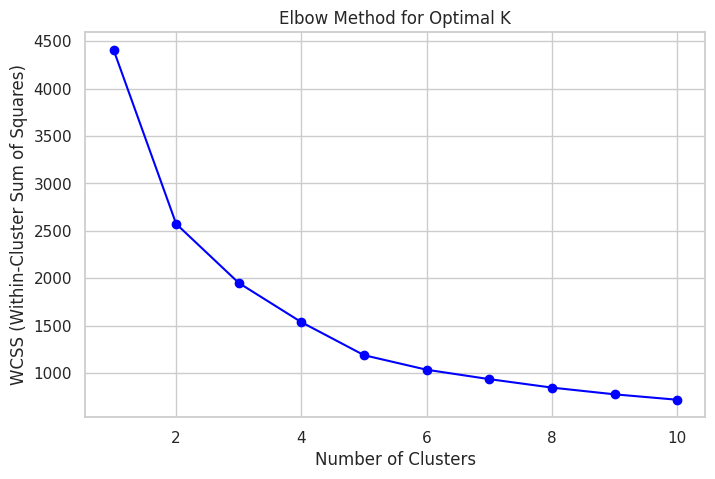

In [33]:
# Elbow Method for Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="blue")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

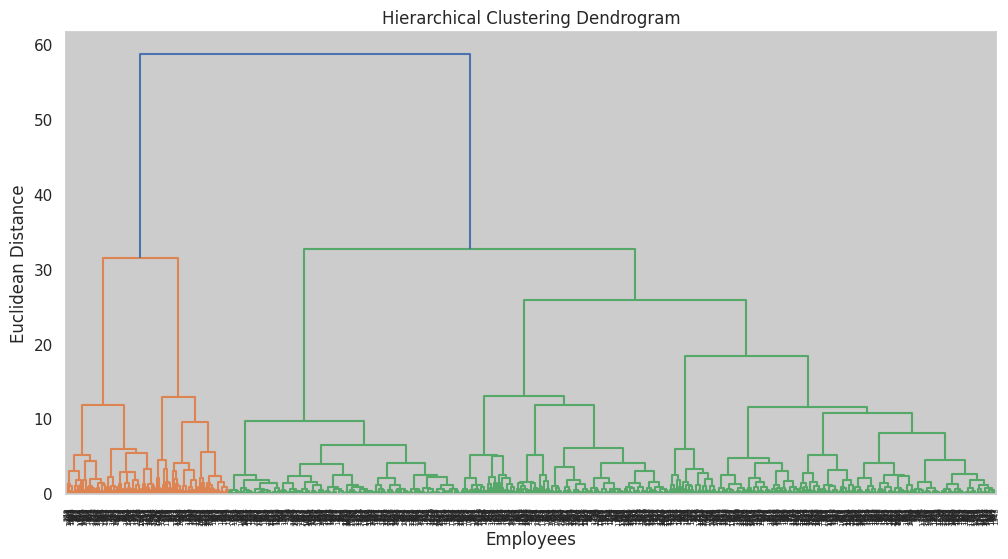

In [34]:
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Employees")
plt.ylabel("Euclidean Distance")
plt.show()

EDA for Causal Inference (DoWhy/CausalML) - Retention Strategies

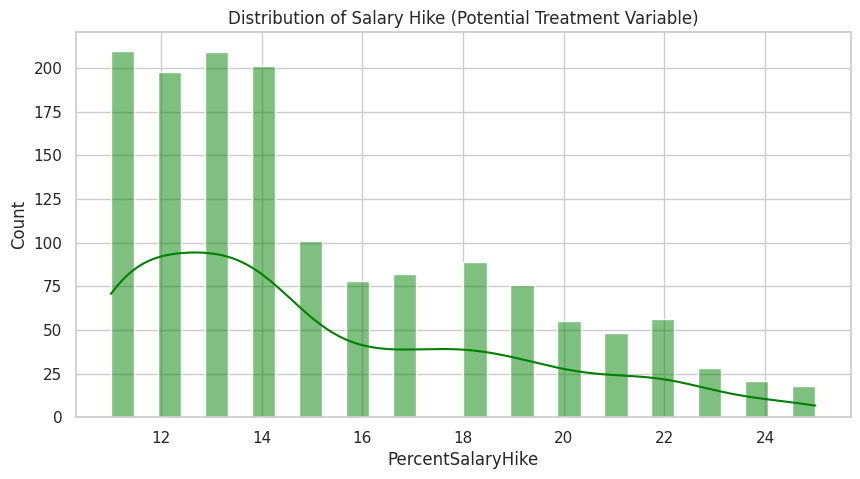

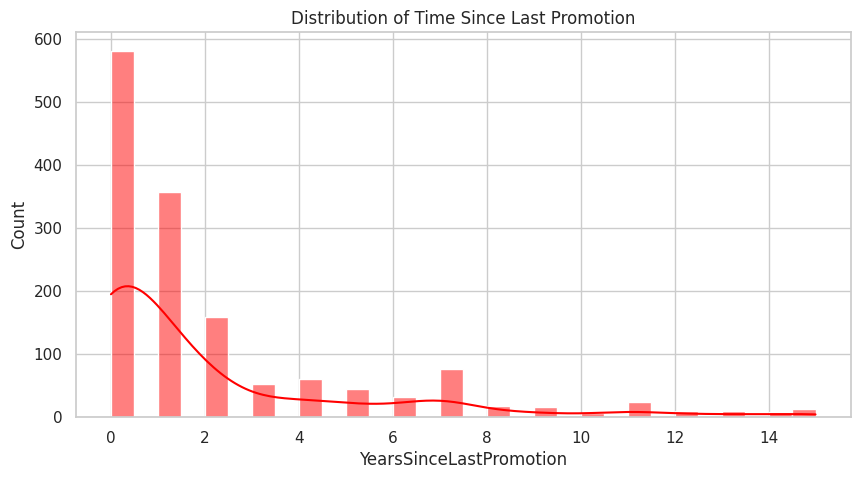

In [35]:
# Propensity Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["PercentSalaryHike"], bins=30, kde=True, color="green")
plt.title("Distribution of Salary Hike (Potential Treatment Variable)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["YearsSinceLastPromotion"], bins=30, kde=True, color="red")
plt.title("Distribution of Time Since Last Promotion")
plt.show()

<ipython-input-36-2127d987c4af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["PercentSalaryHike"], palette="coolwarm")


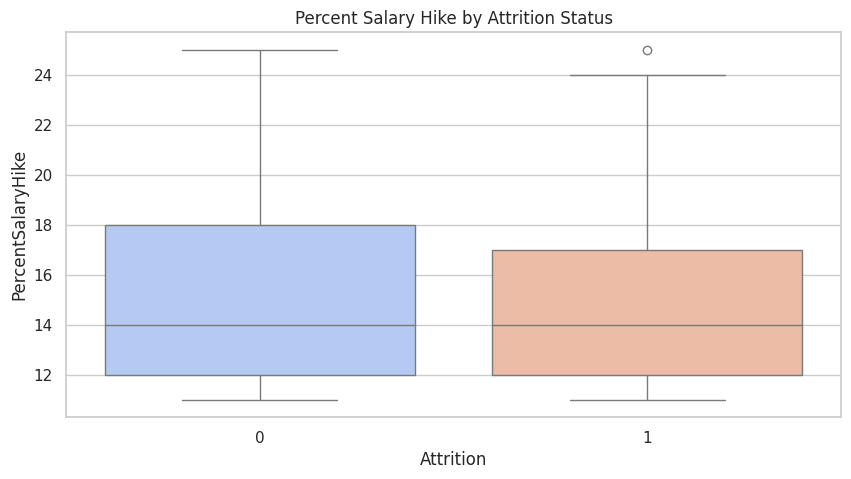

In [36]:
# Balance Check: Compare Treated vs. Non-Treated (e.g., Salary Hike)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Attrition"], y=df["PercentSalaryHike"], palette="coolwarm")
plt.title("Percent Salary Hike by Attrition Status")
plt.show()

<ipython-input-37-00081597bfa2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["YearsAtCompany"], y=df["Attrition"], ci=None, marker="o", color="blue")


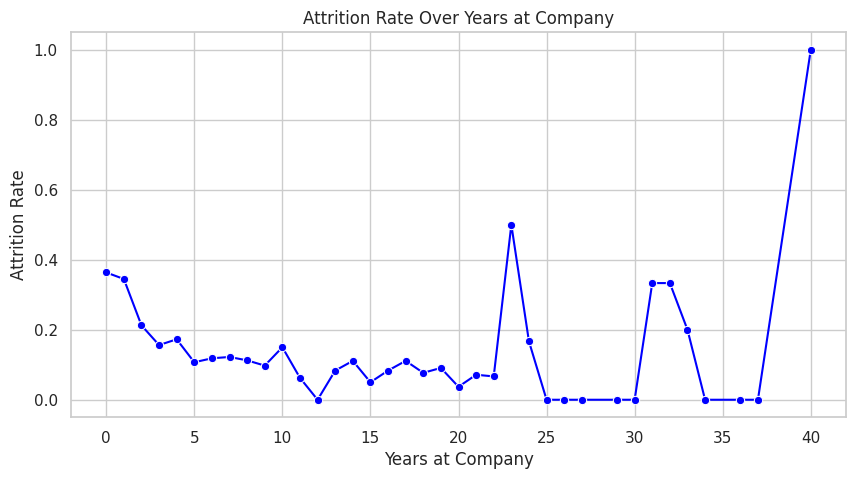

In [37]:
# Attrition Rate Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["YearsAtCompany"], y=df["Attrition"], ci=None, marker="o", color="blue")
plt.title("Attrition Rate Over Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.show()